# PCA

## Theories
- Denote dataset as matrix with columns as feature-vectors, and rows as observations $[\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_d] = [\mathbf{x}_{\vec{1}}^T, \mathbf{x}_{\vec{1}}^T, \dots, \mathbf{x}_{\vec{n}}^T]^T = \mathbf{X} \in \mathbb{R}^{n \times d}$ .
- PCA is a dimensionality reduction method. Algebraically speaking, it finds a subspace of original data, which is obtained by projecting the original dataset $\mathbf{X}$, onto a set of orthonormal basis $[\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_n] = \mathbf{V} \in \mathbb{R}^{d \times d}$. These projections minimize the projection loss, and maximizing the variance of projection lengths on each axis (Pearson, 1901) [1].
- The problem is simplified to a constraint optimization. With covariance matrix $\mathbf{\hat{X}}^T\mathbf{\hat{X}} = \mathbf{C} \in \mathbb{R}^{d \times d}$, where $\mathbf{\hat{X}}$ is the feature-mean-centered matrix of $\mathbf{X}$: $$ \begin{aligned}
  \mathbf{v}_1
    &= \underset{\mathbf{v}}{\text{argmin}}\ \frac{1}{n} \sum_{i=1}^n \| \mathbf{x}_{\vec{i}}-\mathbf{v}^T\mathbf{x}_{\vec{i}}\mathbf{v} \| \ \ s.t.  \| \mathbf{v} \| _2 =1\\
    &= \underset{\mathbf{v}}{\text{argmax}}\ \frac{1}{n} \sum_{i=1}^n\mathbf{v}^T\mathbf{x}_{\vec{i}}\mathbf{x}_{\vec{i}}^T\mathbf{v} \ \ s.t.  \| \mathbf{v} \| _2 =1 \\
    &= \underset{\mathbf{v}}{\text{argmax}}\ \mathbf{v}^T\mathbf{C}\mathbf{v} \ \ s.t.  \| \mathbf{v} \| _2 =1
\end{aligned}$$
- Using Lagrange multipliers to solve this constraint optimization problem. The Lagrange function: $$
  \mathcal{L}(\mathbf{v}, \lambda) = \mathbf{v}^T\mathbf{C}\mathbf{v} - \lambda(\mathbf{v}^T\mathbf{v} - 1)
$$
- Equate Lagrange's gradient to zero: $$ \begin{aligned}
  && \nabla \mathcal{L} &= \mathbf{0}\\
    \Longrightarrow&& 2\mathbf{v}_1^T\mathbf{C} - 2\lambda\mathbf{v}_1^T &= \mathbf{0}^T \\
    \iff&& \mathbf{C}\mathbf{v}_1 &= \lambda\mathbf{v}_1 \ \ (\text{transposed})
\end{aligned} $$
- We have $(\lambda_1, \mathbf{v}_1)$ to be the eigenvalue-eigenvector pair of covariance matrix $\mathbf{C}$. Then, $\mathbf{v}_2$ can be derived by solving a similar constraint optimization problem: $$ \begin{aligned}
  \mathbf{v}_2 = \underset{\mathbf{v}}{\text{argmax}}\ \mathbf{v}^T\mathbf{C}\mathbf{v} \ \ s.t.  \begin{cases}
  \| \mathbf{v} \| _2 &= 1\\
  \mathbf{v}^T\mathbf{v}_1 &= 0
  \end{cases}
\end{aligned}$$
- Once again, solving this using Lagrange multipliers, with $\mathbf{v}_1$ found prior, now acting as constraint. With Lagrange function: $$
  \mathcal{L}(\mathbf{v}, \lambda_2, \mu) = \mathbf{v}^T\mathbf{C}\mathbf{v} - \lambda_2(\mathbf{v}^T\mathbf{v} - 1) - \mu\mathbf{v}^T\mathbf{v}_1
$$
- Equate the Lagrange's gradient to zero: $$\begin{aligned}
&\qquad&
  \nabla\mathcal{L} &= \mathbf{0} \\
    \Longrightarrow&& 2\mathbf{v}_2^T\mathbf{C} - 2\lambda_2\mathbf{v}_2^T - \mu\mathbf{v}_1^T &= \mathbf{0}^T  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ( \ast ) \\
    \iff&& 2\mathbf{v}_2^T\mathbf{C}\mathbf{v}_1 - 2\lambda_2\mathbf{v}_2^T\mathbf{v}_1 - \mu\mathbf{v}_1^T\mathbf{v}_1 &= 0 \ \ \left(\text{dot with}\ \mathbf{v}_1\right)\\
    \iff&& 2\mathbf{v}_2^T\lambda_1\mathbf{v}_1 - 0 - \mu &= 0\\
    \iff&& \mu &= 0
\end{aligned} $$
- Substitute back to $(\ast)$: $$\begin{aligned}
  && 2\mathbf{v}_2^T\mathbf{C} - 2\lambda_2\mathbf{v}_2^T &= \mathbf{0}^T\\
  \iff&& \mathbf{C}\mathbf{v}_2 &= \lambda_2\mathbf{v}_2 \ \ (\text{transposed})
\end{aligned}$$
- This gives us the next eigenvector-eigenvalue pair $(\lambda_2, \mathbf{v}_2)$. This process can be repeated until all eigenvalue-eigenvector pairs $( \lambda_1, \mathbf{v}_1), ( \lambda_2, \mathbf{v}_2), ..., ( \lambda_d, \mathbf{v}_d)$ are found (as orthonormal basis  axis).
- Without loss of generality, sort these so eigenvalues decrease in values (note that covariance matrix is positive-semi definite so eigenvalues are positive reals), we have the first axis captures the most variance, called the **first principle component**, the second axis captures the second most variances, called the **second principle component**, and so on.
- In relation to the SVD, denote the projection lengths as columns of matrix $\mathbf{W} = \mathbf{X}\mathbf{V}$. First we can bring the SVD to: $$ \begin{aligned}
  && \mathbf{X} &= \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \\
  \Longrightarrow&& \mathbf{X}^T \mathbf{X} &= \mathbf{V} \mathbf{\Sigma}^2\mathbf{V}^T  \\
  \Longrightarrow&& \mathbf{X}^T \mathbf{X}\mathbf{V} &= \mathbf{V} \mathbf{\Sigma}^2
\end{aligned} $$
- If we mean-center matrix $\mathbf{X}$, $\mathbf{V}$ in the SVD is the same $\mathbf{V}$ in the PCA. And squared diagonal entries $\mathbf{\sigma}_i^2$ of $\mathbf{\Sigma}$ is the eigenvalues $\lambda_i$. Therefore: $$\begin{aligned}
  \mathbf{W}
    &= \mathbf{X}\mathbf{V}\\
    &= \mathbf{U}\mathbf{\Sigma}
\end{aligned}$$
- If we use all of the principle components, we reconstruct the original dataset. If we use the first $r \leq d$ principle components, we reconstruct a portion of the total variance: $\frac{trace\left(\mathbf{\Sigma}^2_r\right)}{trace\left(\mathbf{\Sigma}^2\right)}$
- In practice it's useful to look at the principle components that capture up to more than 70% of total variances (Cheplyaka, 2017) [2].

## Implementation
- A simple method to find the PCA is to calculate the eigenvectors and eigenvalues of the mean-center covariance matrix [4]. Simple implementation in python, using `numpy.cov`:

In [24]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def PCA(X):
    # X_features:
    # each row = a feature
    # each col = an obs
    X_features = X.T

    # cov matrix: pxp
    covariance_matrix = np.cov(X_features)

    # each eigvec: px1
    # all eigvecs: pxp
    eigvals, eigvecs = np.linalg.eig(covariance_matrix)

    idx = np.argsort(eigvals)[::-1]
    eigenvalues = eigvals[idx]
    eigenvectors = eigvecs[:,idx]

    # diag matrix of eigvals pxp
    explained_variances = []
    by_total = 1 / np.sum(eigenvalues)
    for i in range(len(eigenvalues)):
        explained_variances.append(eigenvalues[i] * by_total)

    return eigenvalues, eigenvectors, explained_variances

X = np.array([[1, 4, 4], [2, 5, 6], [8, 3 ,2], [1, 1, 7]])
scaler = StandardScaler()
X_mc = scaler.fit_transform(X)
print(X_mc)
eigvals, eigvecs, expl_variances = PCA(X_mc)
print(eigvals)
print(eigvecs)
print(expl_variances)

[[-0.68599434  0.50709255 -0.39056673]
 [-0.34299717  1.18321596  0.65094455]
 [ 1.71498585 -0.16903085 -1.43207802]
 [-0.68599434 -1.52127766  1.1717002 ]]
[2.45258503 1.33333333 0.21408163]
[[-6.77069129e-01 -2.88365720e-01 -6.77069129e-01]
 [-2.03905356e-01  9.57520345e-01 -2.03905356e-01]
 [ 7.07106781e-01 -1.54398654e-16 -7.07106781e-01]]
[0.6131462581803182, 0.33333333333333337, 0.053520408486348384]


- Using `np.linalg.svd`

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def PCA_SVD(X):
    X_mc = X - X.mean(axis=0)
    U,S,Vt = np.linalg.svd(X_mc)

    S_sq = S**2
    idx = np.argsort(S_sq)[::-1]
    eigenvalues = S_sq[idx]
    eigenvectors = Vt.T[:,idx]

    by_total = 1/np.sum(S_sq)
    explained = [si_sq * by_total for si_sq in S_sq]

    return eigenvalues, eigenvectors, explained

X = np.array([[1, 4, 4], [2, 5, 6], [8, 3 ,2], [1, 1, 7]])
scaler = StandardScaler()
X_mc = scaler.fit_transform(X)
print(X_mc)
eigvals, eigvecs, expl_variances = PCA_SVD(X_mc)
print(eigvals)
print(eigvecs)
print(expl_variances)

[[-0.68599434  0.50709255 -0.39056673]
 [-0.34299717  1.18321596  0.65094455]
 [ 1.71498585 -0.16903085 -1.43207802]
 [-0.68599434 -1.52127766  1.1717002 ]]
[7.3577551 4.        0.6422449]
[[ 6.77069129e-01 -2.88365720e-01 -6.77069129e-01]
 [ 2.03905356e-01  9.57520345e-01 -2.03905356e-01]
 [-7.07106781e-01  1.11022302e-16 -7.07106781e-01]]
[0.6131462581803184, 0.3333333333333332, 0.05352040848634844]


## Visualisation
### a. 2-dimensional data
- **Data**:

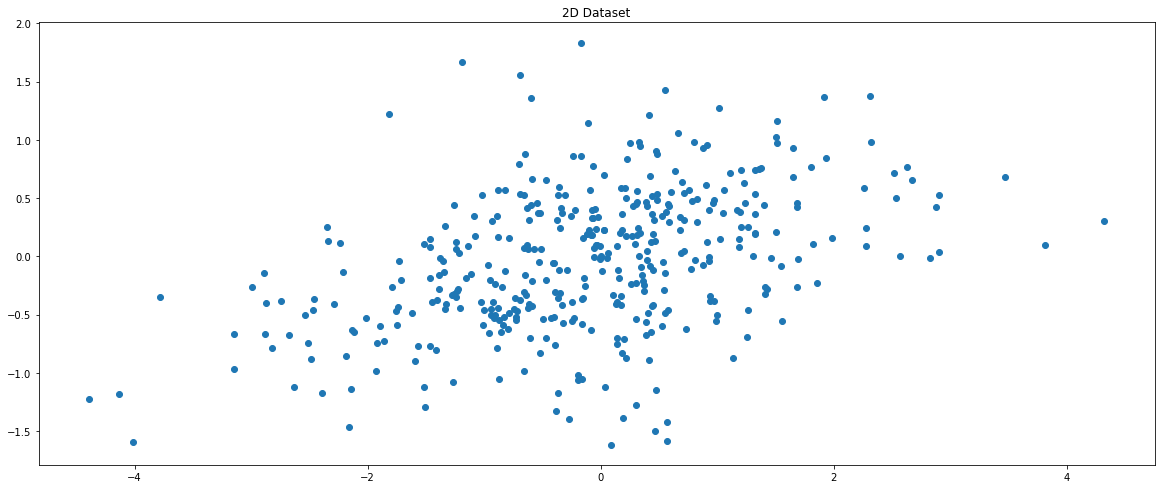

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def PCA_SVD(X):
    X_mc = X - X.mean(axis=0)
    U,S,Vt = np.linalg.svd(X_mc)

    S_sq = S**2
    idx = np.argsort(S_sq)[::-1]
    eigenvalues = S_sq[idx]
    eigenvectors = Vt.T[:,idx]

    by_total = 1/np.sum(S_sq)
    explained = [si_sq * by_total for si_sq in S_sq]

    return eigenvalues, eigenvectors, explained

n_samples = 200
# Sample generation using sklearn [7], borrowed from [8]
C = np.array([[0., 0.4], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C), .7 * np.random.randn(n_samples, 2)]
plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.set_aspect('equal')
plt.scatter(x=X[:,0], y=X[:, 1])
plt.title('2D Dataset')
plt.show()

- **PCA reconstruction, or axis**:

[[ 0.97107266  0.23878421]
 [ 0.23878421 -0.97107266]]
[0.97107266 0.23878421] [ 0.23878421 -0.97107266]


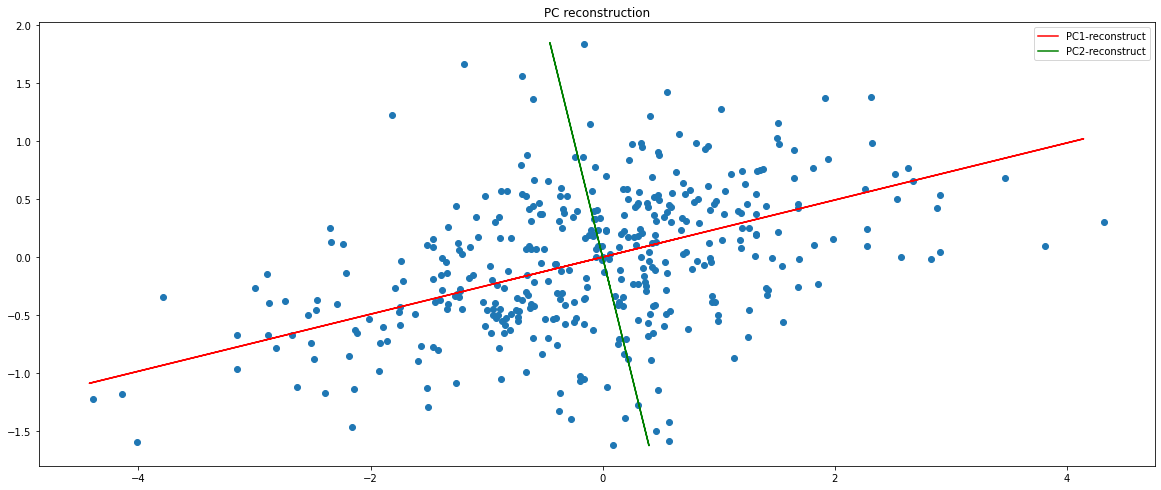

In [27]:
# the PCA results
eigvals, eigvecs, explained = PCA_SVD(X)
# reconstruct using only the first PC
V1 = eigvecs[:, 0]
V2 = eigvecs[:, 1]
print(eigvecs)
print(V1, V2)
# projection on first PC
proj1 = X.dot(V1).reshape(-1, 1)
proj2 = X.dot(V2).reshape(-1, 1)
# reconstruct
X_hat1 = proj1.dot(V1.reshape(1, -1))
X_hat2 = proj2.dot(V2.reshape(1, -1))

plt.figure(figsize=(20, 10))
plt.scatter(x=X[:, 0], y=X[:, 1])
plt.title('PC reconstruction')

ax = plt.gca()
ax.set_aspect('equal')
plt.plot(X_hat1[:, 0], X_hat1[:, 1], color='red', label='PC1-reconstruct')
plt.plot(X_hat2[:, 0], X_hat2[:, 1], color='green', label='PC2-reconstruct')

plt.legend()
plt.show()

### b. Understanding high-dimensional data
   - Obviously it isn't possible to graph a reconstruction with respect to the entire dataset when it comes to higher than 3 dimensions. Therefore the approach is simply to use 2 or 3 PCs as principle axis. Using this new basis, we use projection length as the dataset's coordinates, and plot them to visualise.
    - For 2D, this is equivalent to using the red line above as 1D axis, and all the projected vectors from the original dataset onto it as 1D coordinate.
    - Consider this generated 10-dimensional dataset, which is simply 2 hyper-ball blobs of 200 datapoints, surrounded by uniformly distributed cloud of 20 datapoints, using `sklearn` [5]:

In [28]:
rng = np.random.RandomState(42)
blobs_params = dict(random_state=0, n_samples=n_samples, n_features=10)
blobs = make_blobs(
    centers=[2*np.ones(10), (-2)*np.ones(10)],
    cluster_std=[1.0, 0.75],
    **blobs_params)[0]
sparse_clouds = rng.uniform(low=-6, high=6, size=(20, 10))
data = np.concatenate([blobs, sparse_clouds], axis=0)
print(data.shape) # (220, 10) as 220 observations of 10 features

(220, 10)


- Obviously we know the "shapes" of the data by generation methods. The data despite living in 10 dimensions, can be imagined in 3D, and intuitively can be represented in lower dimensions. PCA achieves exactly this. First off, start by looking at PCA results.

In [29]:
scaler.fit_transform(data)
eigvals, eigvecs, explained = PCA_SVD(data)
print(explained)

[0.6877553738373848, 0.06622849569511721, 0.05364071452308574, 0.043896629515399535, 0.03369527682233244, 0.029720311092767585, 0.027124855412712378, 0.021153127361453736, 0.019346387223788033, 0.01743882851595836]


- As seen here, the first 3 principles components captures up to nearly 80% of variances. The graphical representation aligns with this fact.

Text(0.5, 1.0, '2D projection onto the first 2 principle axes')

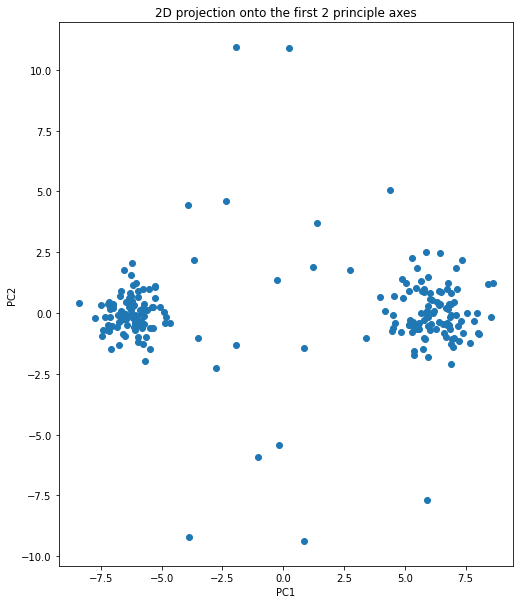

In [30]:
# 2D projection plot
W = eigvecs[:, :3] # first 3 principle axis
proj = data.dot(W)
plx = proj[:, 0]
ply = proj[:, 1]
plz = proj[:, 2]
plt.figure(figsize=(20, 10))
plt.scatter(x=plx, y=ply)
plt.xlabel('PC1')
plt.ylabel('PC2')

ax = plt.gca()
ax.set_aspect('equal')
plt.title('2D projection onto the first 2 principle axes')

- The data is shown as 2 blobs surrounded by sparse points, as we already know.
- We can go further as to analyse the 3D plot.

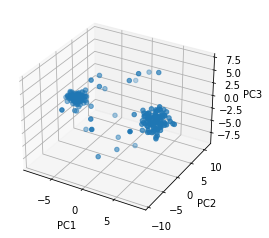

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.scatter(plx, ply, plz)

- For further understanding of the dataset, we can look at some less significant principle components.

Text(0.5, 1.0, '2D projection onto the last 2 principle axes')

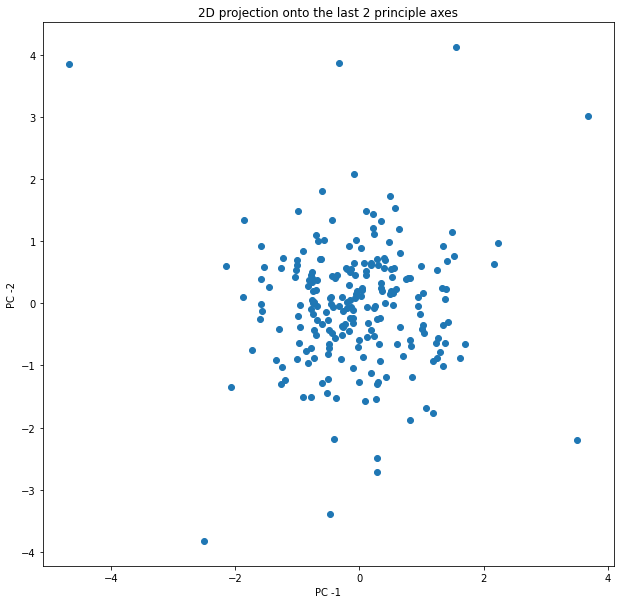

In [32]:
# 2D projection plot
W = eigvecs[:, -3:] # last 3 principle axis
proj = data.dot(W)
plz = proj[:, 0]
ply = proj[:, 1]
plx = proj[:, 2]
plt.figure(figsize=(20, 10))
plt.scatter(x=plx, y=ply)
plt.xlabel('PC -1')
plt.ylabel('PC -2')

ax = plt.gca()
ax.set_aspect('equal')
plt.title('2D projection onto the last 2 principle axes')

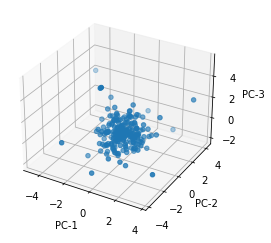

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')
ax.scatter(plx, ply, plz)

- Sparse cloud with very little information (variances).

# Demo on sklearn iris data
- Refer to [sklearn toy dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html) [5].

## Using np SVD

(150,)
[0.7296244541329986, 0.22850761786701773, 0.03668921889282876, 0.005178709107154796]
        PC1       PC2       PC3  Y
0 -2.264703 -0.480027  0.127706  0
1 -2.080961  0.674134  0.234609  0
2 -2.364229  0.341908 -0.044201  0
3 -2.299384  0.597395 -0.091290  0
4 -2.389842 -0.646835 -0.015738  0


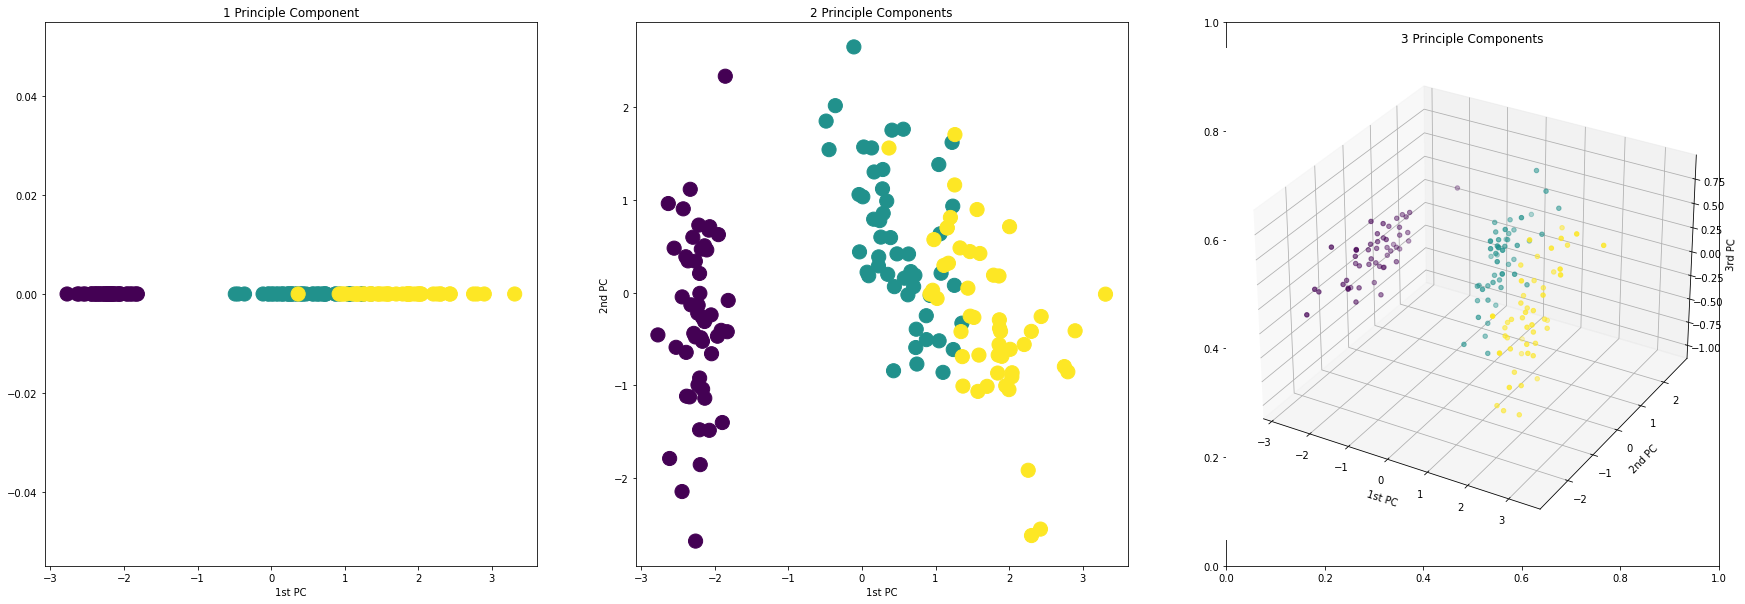

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
print(y.shape)

X_scaled = StandardScaler().fit_transform(X)
eigvals, eigvecs, explained = PCA_SVD(X_scaled)
print(explained)

W_3 = eigvecs[:, :3]
proj = X_scaled.dot(W_3)

res = pd.DataFrame()
for i in range(3):
    name = "PC" + str(i+1)
    res[name] = proj[:, i]

res["Y"] = y
print(res.head())

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].set(title="1 Principle Component", xlabel="1st PC")
axs[0].scatter(x=res["PC1"], y=np.zeros(y.shape[0]), c=res["Y"], s=200)

axs[1].set(title="2 Principle Components", xlabel="1st PC", ylabel="2nd PC")
axs[1].scatter(x=res["PC1"], y=res["PC2"], c=res["Y"], s=200)

ax3 = fig.add_subplot(133, projection = '3d')
ax3.set(title="3 Principle Components", xlabel="1st PC", ylabel="2nd PC", zlabel="3rd PC")
ax3.scatter(res["PC1"], res["PC2"], res["PC3"], c=res["Y"])

plt.show()

## Using np Cov

(150,)
[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
[0.7296244541329989, 0.22850761786701754, 0.03668921889282864, 0.005178709107154904]
        PC1       PC2       PC3  Y
0 -2.264703 -0.480027  0.127706  0
1 -2.080961  0.674134  0.234609  0
2 -2.364229  0.341908 -0.044201  0
3 -2.299384  0.597395 -0.091290  0
4 -2.389842 -0.646835 -0.015738  0


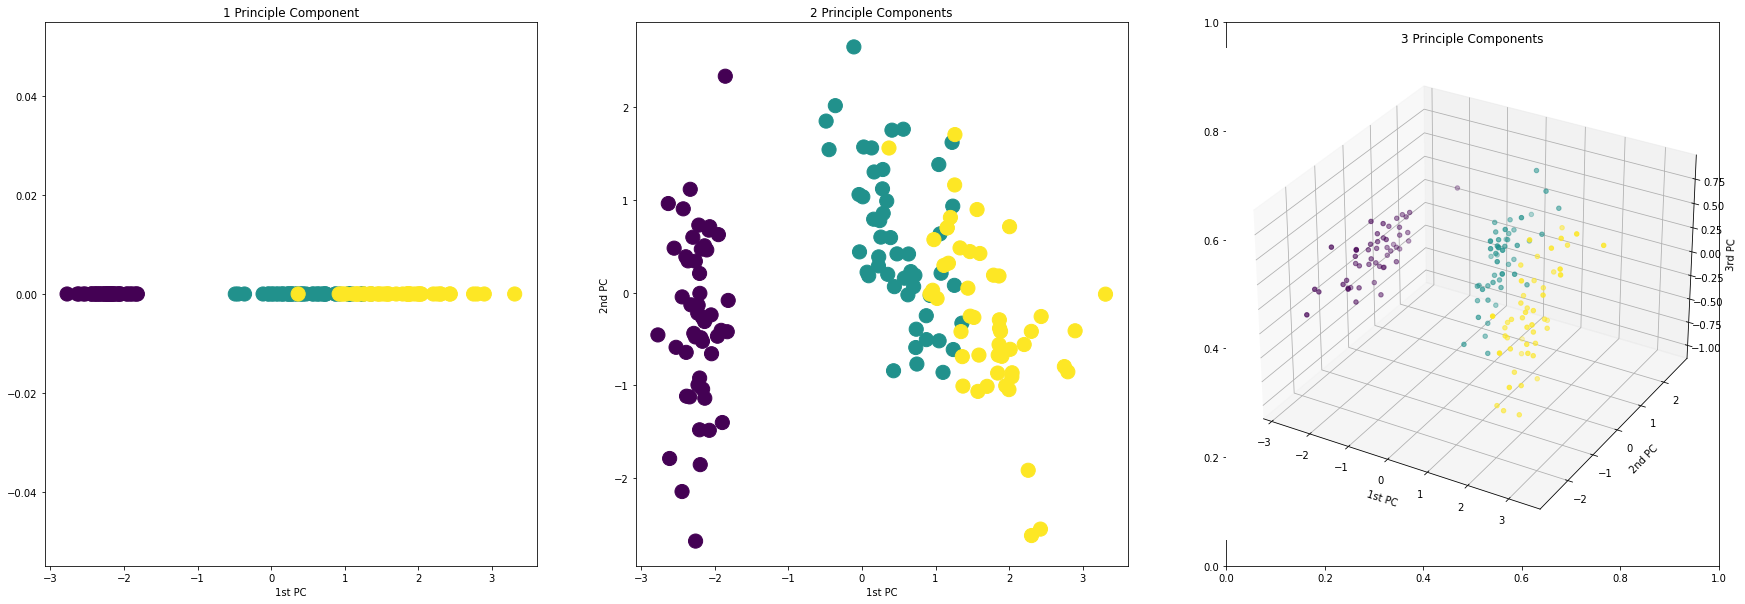

In [35]:
iris = load_iris()
X = iris.data
y = iris.target
print(y.shape)

X_scaled = StandardScaler().fit_transform(X)
eigvals, eigvecs, expl_variances = PCA(X_scaled)
print(eigvals)
print(eigvecs)
print(expl_variances)

W_3 = eigvecs[:, :3]

res = pd.DataFrame()
for i in range(3):
    name = "PC" + str(i+1)
    res[name] = proj[:, i]

res["Y"] = y
print(res.head())

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].set(title="1 Principle Component", xlabel="1st PC")
axs[0].scatter(x=res["PC1"], y=np.zeros(y.shape[0]), c=res["Y"], s=200)

axs[1].set(title="2 Principle Components", xlabel="1st PC", ylabel="2nd PC")
axs[1].scatter(x=res["PC1"], y=res["PC2"], c=res["Y"], s=200)

ax3 = fig.add_subplot(133, projection = '3d')
ax3.set(title="3 Principle Components", xlabel="1st PC", ylabel="2nd PC", zlabel="3rd PC")
ax3.scatter(res["PC1"], res["PC2"], res["PC3"], c=res["Y"])

plt.show()

# References
- [1] Pearson, Karl. (1901). LIII. On lines and planes of closest fit to systems of points in space. https://doi.org/10.1080/14786440109462720
- [2] Kamperis, S., 2020. Principal component analysis with Lagrange multiplier. A blog on science. Available at: https://ekamperi.github.io/mathematics/2020/11/01/principal-component-analysis-lagrange-multiplier.html [Accessed August 30, 2021]. principal-component-analysis-lagrange-multiplier.html
- [3] Gerbrands, J.J., 1981. On the relationships between SVD, KLT and PCA. Pattern Recognition, 14(1-6), pp.375–381.
- [4] Holland, S.M., 2019. Principle Component Analysis (PCA). Department of Geology, University of Georgia, Athens, GA-30602(2501).
- [5] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011